In [3]:
import pandas as pd
from astropy.table import Table
from astropy.io import fits
from astropy.io import ascii

#fits_image_filename = fits.util.get_testdata_filepath('gll_psc_v32.fit')

hdul = fits.open('gll_psc_v32.fit')
print(hdul[1])

table = Table.read('gll_psc_v32.fit',hdu=1)
ascii.write(table, 'hdu1.ecsv', overwrite=True, format = 'ecsv')
#df = table.to_pandas()
#df.to_csv('gll.csv')
print(table)

   Source_Name     DataRelease RAJ2000  ... Unc_Counterpart Flags
                                 deg    ...       deg            
------------------ ----------- -------- ... --------------- -----
4FGL J0000.3-7355            1   0.0983 ...              --     0
4FGL J0000.5+0743            2   0.1375 ...              --     0
4FGL J0000.7+2530            3   0.1878 ...              --     0
4FGL J0001.2+4741            1   0.3126 ...         0.00000     0
4FGL J0001.2-0747            1   0.3151 ...         0.00000     0
4FGL J0001.4-0010            3   0.3717 ...         0.00450     0
4FGL J0001.5+2113            1   0.3815 ...         0.00000     0
4FGL J0001.6+3503            3   0.4098 ...              --     0
4FGL J0001.6-4156            1   0.4165 ...         0.00007     0
4FGL J0001.8-2153            3   0.4647 ...         0.00000  4096
               ...         ...      ... ...             ...   ...
4FGL J2359.0-3038            1 359.7719 ...         0.00000     0
4FGL J2359

In [6]:
table = ascii.read('hdu1.txt')

fermi_lat = table.to_pandas()
print(fermi_lat.columns)

Index(['Source_Name', 'DataRelease', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT',
       'Conf_68_SemiMajor', 'Conf_68_SemiMinor', 'Conf_68_PosAng',
       'Conf_95_SemiMajor', 'Conf_95_SemiMinor', 'Conf_95_PosAng', 'ROI_num',
       'Extended_Source_Name', 'Signif_Avg', 'Pivot_Energy', 'Flux1000',
       'Unc_Flux1000', 'Energy_Flux100', 'Unc_Energy_Flux100', 'SpectrumType',
       'PL_Flux_Density', 'Unc_PL_Flux_Density', 'PL_Index', 'Unc_PL_Index',
       'LP_Flux_Density', 'Unc_LP_Flux_Density', 'LP_Index', 'Unc_LP_Index',
       'LP_beta', 'Unc_LP_beta', 'LP_SigCurv', 'LP_EPeak', 'Unc_LP_EPeak',
       'PLEC_Flux_Density', 'Unc_PLEC_Flux_Density', 'PLEC_IndexS',
       'Unc_PLEC_IndexS', 'PLEC_ExpfactorS', 'Unc_PLEC_ExpfactorS',
       'PLEC_Exp_Index', 'Unc_PLEC_Exp_Index', 'PLEC_SigCurv', 'PLEC_EPeak',
       'Unc_PLEC_EPeak', 'Npred', 'Flux_Band', 'Unc_Flux_Band', 'nuFnu_Band',
       'Sqrt_TS_Band', 'Variability_Index', 'Frac_Variability',
       'Unc_Frac_Variability', 'Signif_Peak'

In [8]:
radiogal = ['rdg']
known_radio = pd.DataFrame(radiogal, columns=['CLASS1'])

fermi_lat_radioonly = pd.DataFrame.merge(known_radio,fermi_lat, how = 'inner')

fermi_lat_radioonly.to_csv('known_radiogalaxy_only_data.csv')

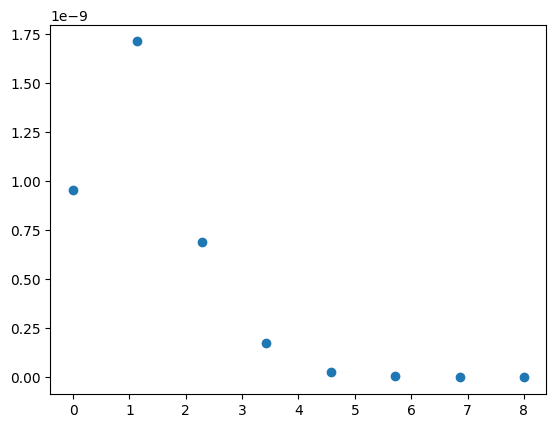

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak

obj_data = fermi_lat_radioonly['Flux_Band'][0]
obj_data = obj_data.replace('[','') 
obj_data = obj_data.replace(']','') 
float_data = [float(idx) for idx in obj_data.split(',')]

plt.scatter(np.linspace(0,len(float_data),num=len(float_data)),float_data)

In [67]:
print(fermi_lat_radioonly[''])

0        PowerLaw
1     LogParabola
2        PowerLaw
3        PowerLaw
4        PowerLaw
5        PowerLaw
6        PowerLaw
7        PowerLaw
8        PowerLaw
9     LogParabola
10       PowerLaw
11       PowerLaw
12       PowerLaw
13       PowerLaw
14    LogParabola
15       PowerLaw
16       PowerLaw
17       PowerLaw
18       PowerLaw
19       PowerLaw
20       PowerLaw
21    LogParabola
22       PowerLaw
23       PowerLaw
24    LogParabola
25    LogParabola
26       PowerLaw
27       PowerLaw
28       PowerLaw
29    LogParabola
30       PowerLaw
31       PowerLaw
32    LogParabola
33       PowerLaw
34    LogParabola
35       PowerLaw
36       PowerLaw
37    LogParabola
38       PowerLaw
39       PowerLaw
40       PowerLaw
41    LogParabola
42       PowerLaw
43       PowerLaw
44       PowerLaw
45       PowerLaw
46    LogParabola
Name: SpectrumType, dtype: object
